In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from thomson import *
from lsst.sims.utils import _healbin
import healpy as hp
from scipy.optimize import OptimizeResult


In [51]:
npts = 1000
theta, phi = fib_sphere_grid(npts)
# Note, declination = phi - pi/2, RA = theta
x, y, z = thetaphi2xyz(theta, phi)

<IPython.core.display.Javascript object>


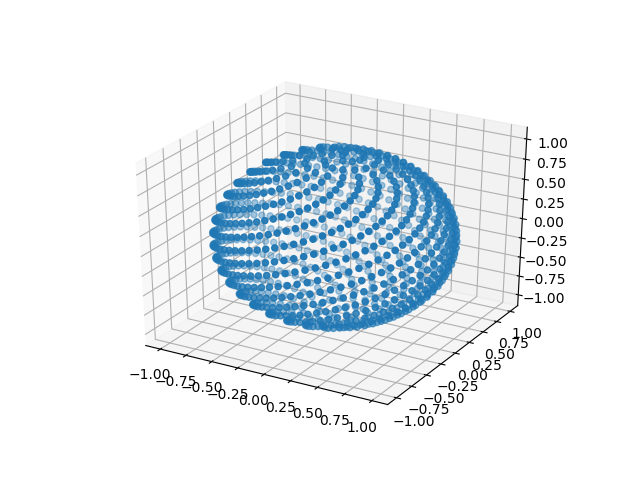

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

<IPython.core.display.Javascript object>


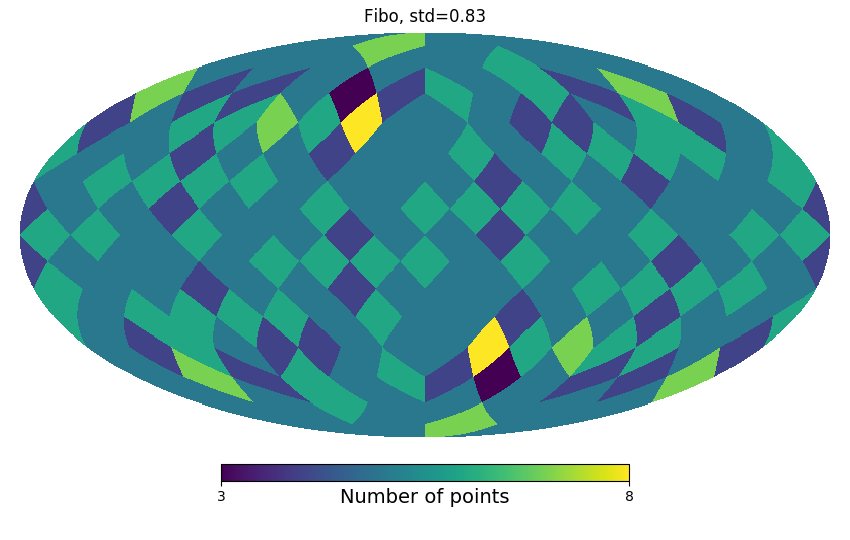

In [52]:
nside = 4
density = _healbin(theta, phi-np.pi/2, theta*0+1, nside=nside, reduceFunc=np.sum)
hp.mollview(density, unit='Number of points', title='Fibo, std=%.2f' % np.std(density))

In [53]:
x0 = np.concatenate((x,y,z))
print(elec_potential_xyz(x0))

483744.281799


In [56]:
fit_result = minimize_global(elec_potential_xyz, x0, maxiter=300, stepsize=0.4)
fit_result.fun, fit_result.nit

(483140.88022069773, 232)

<IPython.core.display.Javascript object>


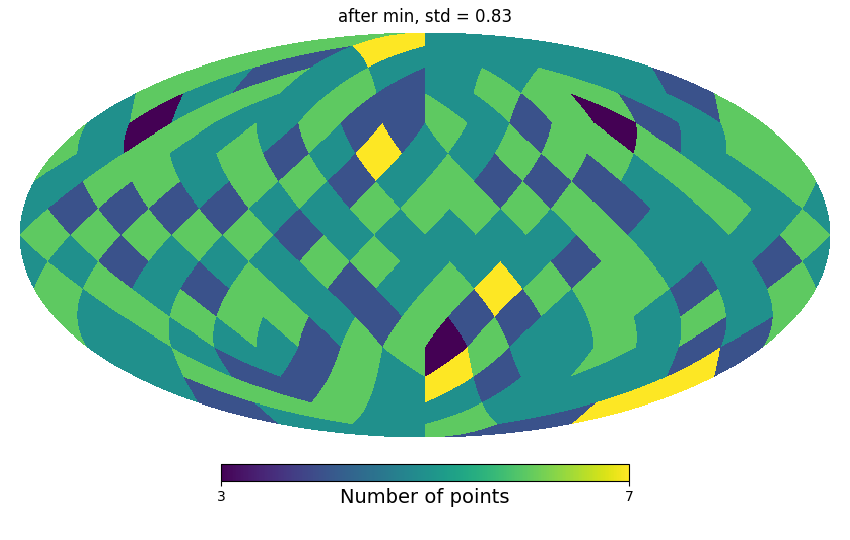

In [57]:
theta, phi = xyz2thetaphi(*x0_split(fit_result.x))
nside = 4
density = _healbin(theta, phi-np.pi/2, theta*0+1, nside=nside, reduceFunc=np.sum)
hp.mollview(density, unit='Number of points', title='after min, std = %.2f' % np.std(density))

<IPython.core.display.Javascript object>


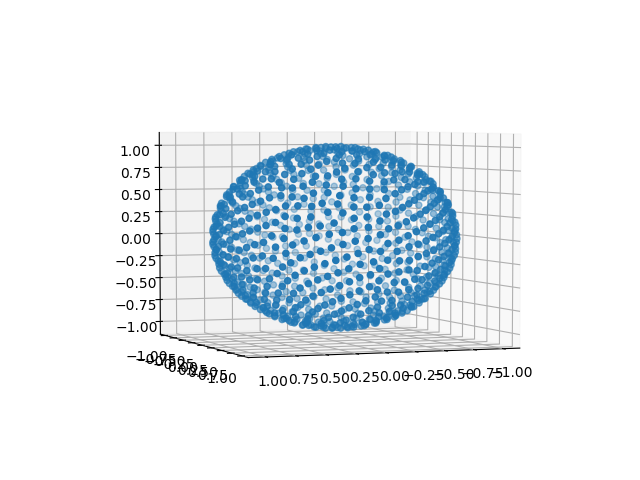

In [58]:
x,y,z = x0_split(fit_result.x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

In [20]:
# Try starting random
theta = np.random.rand(npts)*np.pi*2.
phi = np.arccos(2.*np.random.rand(npts)-1.)

x0 = np.concatenate(thetaphi2xyz(theta, phi))

In [21]:
fit_result = minimize_global(elec_potential_xyz, x0, maxiter=300, stepsize=0.6)
fit_result.fun, fit_result.nit

     fun: 18483.760243854183
    nfev: 1
     nit: 89
 success: True
       x: array([ -7.00634247e-01,  -3.80906245e-01,   8.60809399e-01,
        -4.09298060e-01,  -8.08934915e-01,   2.70868514e-02,
        -5.47281983e-01,  -1.67663436e-01,  -7.35473959e-02,
         2.63007148e-01,  -1.55607478e-01,   5.27284514e-01,
        -7.54438626e-01,   5.50821573e-01,  -3.78556724e-01,
        -3.55814364e-01,   7.28251698e-01,   2.25567406e-01,
        -4.19553748e-01,   4.89140538e-01,   8.32432044e-01,
        -9.41955411e-01,   6.05851571e-01,   9.77341279e-01,
        -3.57622225e-01,   3.08627801e-01,  -5.65955846e-01,
        -2.14384119e-01,   4.91362799e-01,   3.76006747e-01,
         6.11415305e-01,  -8.95664686e-02,   7.36135329e-01,
         3.31026262e-01,  -3.10815093e-01,  -3.44574826e-01,
        -9.78633797e-01,  -7.98895221e-01,   9.99057199e-01,
        -6.00968389e-01,  -1.27977060e-01,   4.14119624e-01,
        -4.22695522e-01,  -3.95753698e-01,  -3.42061913e-01,
      

<IPython.core.display.Javascript object>


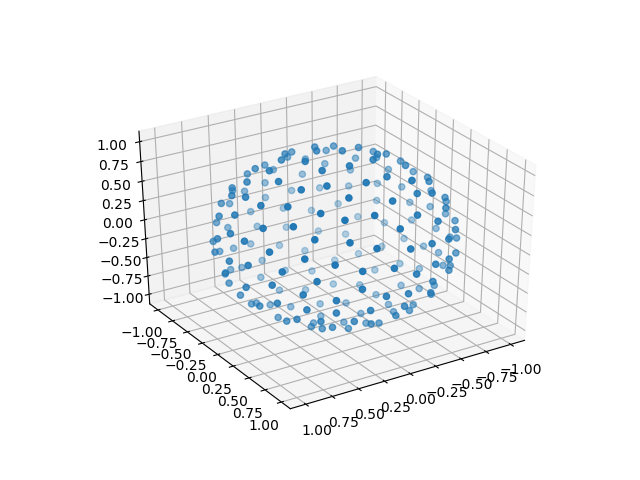

In [22]:
x,y,z = x0_split(fit_result.x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
